#**KKBox music recommendation challenge**
- KKBox is music streaming platform, like gaana.com,saavan.com..,, they have provided their
dataset to ML_community through kaggle.com and they want ML_community to build a better
music recommendation system using newer algorithms, currently they are using collaborative
filtering based algorithms with matrix factorization and word embedding in their recommendation
system.

- We have to build the model which will predict whether a user will re-listen to the song or
what kind of song currently he is interested in by evaluating given features of the user
and songs.
- We are going use logistic regression, XGBClassifier,AdaBoostClassifier,DecisionTree,RandomForest to find which algorith gives highest accuracy and correct feature importance then based on this we will select best algorith to select importance on top of that again we will use best feature to build best algorith

<span style="color:red">**--> Mounting my google drive t get data from my drive**</span>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
path1 = "/content/drive/My Drive/music recommendation system/members.csv"
path2 = "/content/drive/My Drive/music recommendation system/song_extra_info.csv"
path3 = "/content/drive/My Drive/music recommendation system/songs.csv"
path4 = "/content/drive/My Drive/music recommendation system/test.csv"
path5 = "/content/drive/My Drive/music recommendation system/train.csv"
members    = pd.read_csv(path1)
song_extra = pd.read_csv(path2)
songs      = pd.read_csv(path3)
test       = pd.read_csv(path4)
train      = pd.read_csv(path5)


#**EDA**
**--> EDA is stand for exploratory data analysis it is used to understand/explore the data and find any faulty data available which can be removed by using pre-processing techniques**

##**.head()**
**it displayes top 5 rows of our data frames**

##**members.csv**
**This file contain members information**

1.   msno --------------------------> basically members no or we can say its user_id
2.   city -----------------------------> city user belongs to
3.   gender ------------------------> Male/Female
4.   registered_via -------------> register method
5.   registration_init_time --> registration time
6.   expiration_date -----------> expiry date



In [ ]:
members.head() # Displaying top 5 data frames in members csv file

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


##**finding outliers in "bd" column**

> Indented block


when we read description of our data in kaggle there they have told that "bd" column of members.csv might contain outliers so lets find-out

#**Box plot**
outliers in **Box plot** is represted by individual points

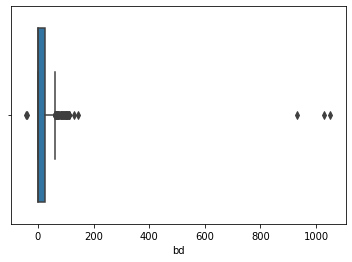

In [ ]:
sns.boxplot(x=members['bd'])

##We can see there is many points which are outside the **Box plot** and these are our outliers

#**Count plot**

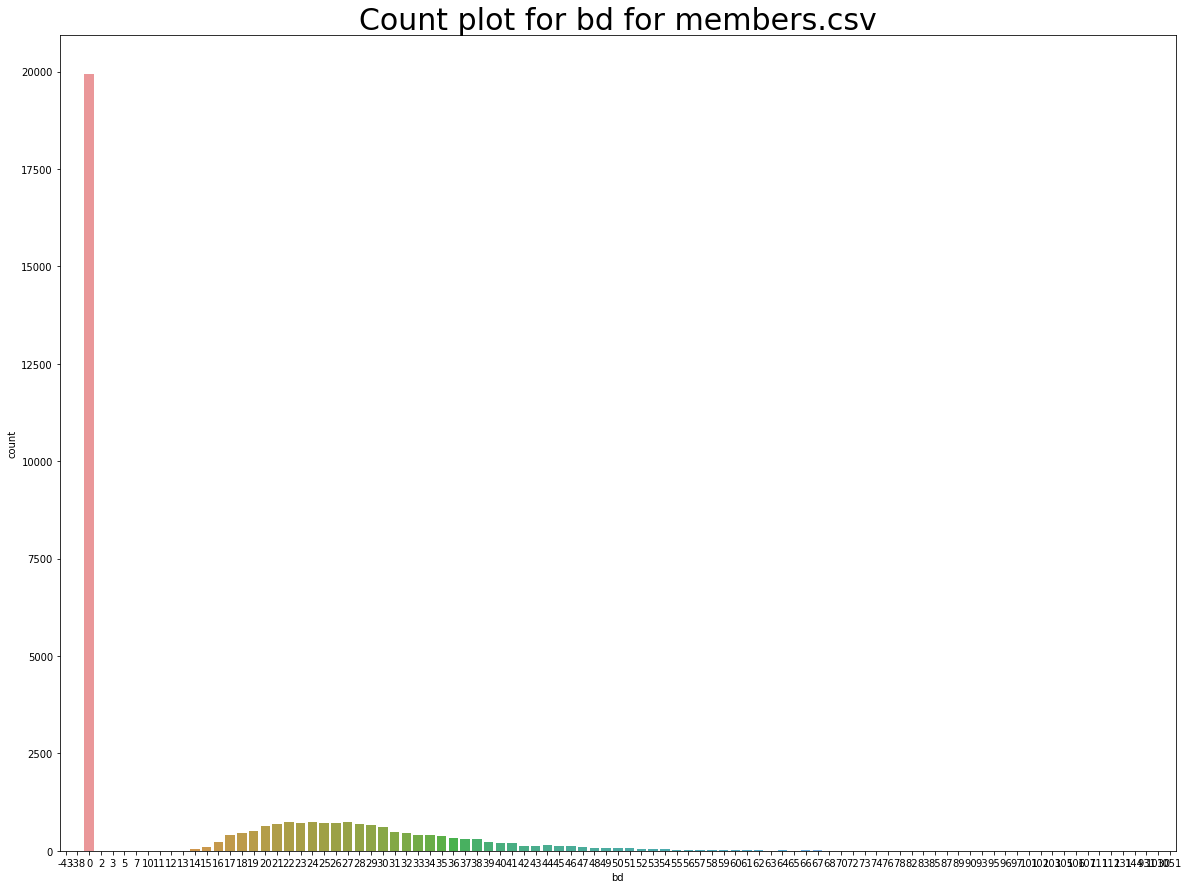

In [ ]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='bd', data = members) 
#plt.xticks(rotation='45')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

In [ ]:
members["bd"].describe()

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

In [ ]:
count=0
for i in members["bd"]:
  if i<=50 and i>=10:
    count+=1
percentage=(count/len(members["bd"]))*100
percentage=("{:.2f}".format(percentage))
print(percentage,"% of user is between 10 and 50")

40.74 % of user is between 10 and 50


##**SUMMARY of "bd" column of members.csv**
Along with plots when we used **.describe()** function we have found 50% value is zero's which means half of our data is outliers and we also found that we have max value as 1051 and min value as -43 as all we know no one can have age belonging to these number's
we have found 40.74% user has age between 10-50 however if we remove outliers from our data then this percentage value will increase to 98-99% because we have 50% of our data as zero's


#**gender column**
we can see from **.head()** there are NaN values in gender column so lets find out

##**pie plot**

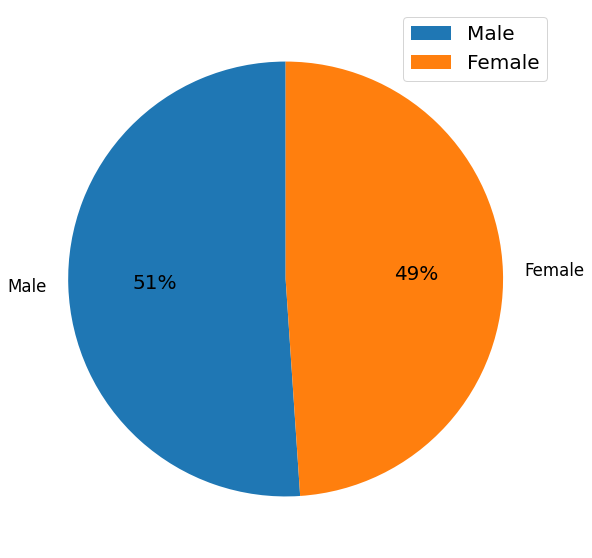

In [ ]:
# cited from: https://www.kaggle.com/rohandx1996/recommendation-system-with-83-accuracy-lgbm
import matplotlib as mpl

mpl.rcParams['font.size'] = 20.0
labels = ['Male','Female']
plt.figure(figsize = (10, 10))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

##From above pie we can see that ratio between male and female is almost equal which is 51% are male and 49% female but when we use pie chart or count plot it just ignore NaN value

-->so let's find out number of NaN values available

In [ ]:
count = members["gender"].isna().sum()
percentage=(count/len(members['gender']))*100
percentage = "{:.3f}".format(percentage)
print("Total count of gender column of members                   :  ",len(members['gender']))
print("Number of NaN value in gender column of members           :  ",count)
print("Number of non-NaN value in gender coumn of members        :  ",(len(members['gender'])-count))
print("Total percentage of NaN value in gender column of members :  ",percentage+" %")
print("-----------------------------------------------------------------------")


Total count of gender column of members                   :   34403
Number of NaN value in gender column of members           :   19902
Number of non-NaN value in gender coumn of members        :   14501
Total percentage of NaN value in gender column of members :   57.850 %
-----------------------------------------------------------------------


#**SUMMARY**
We can see that 57% values are NaN and it's pretty high we have to handle it during fe(feature engineering)

#**Count plot for city column**

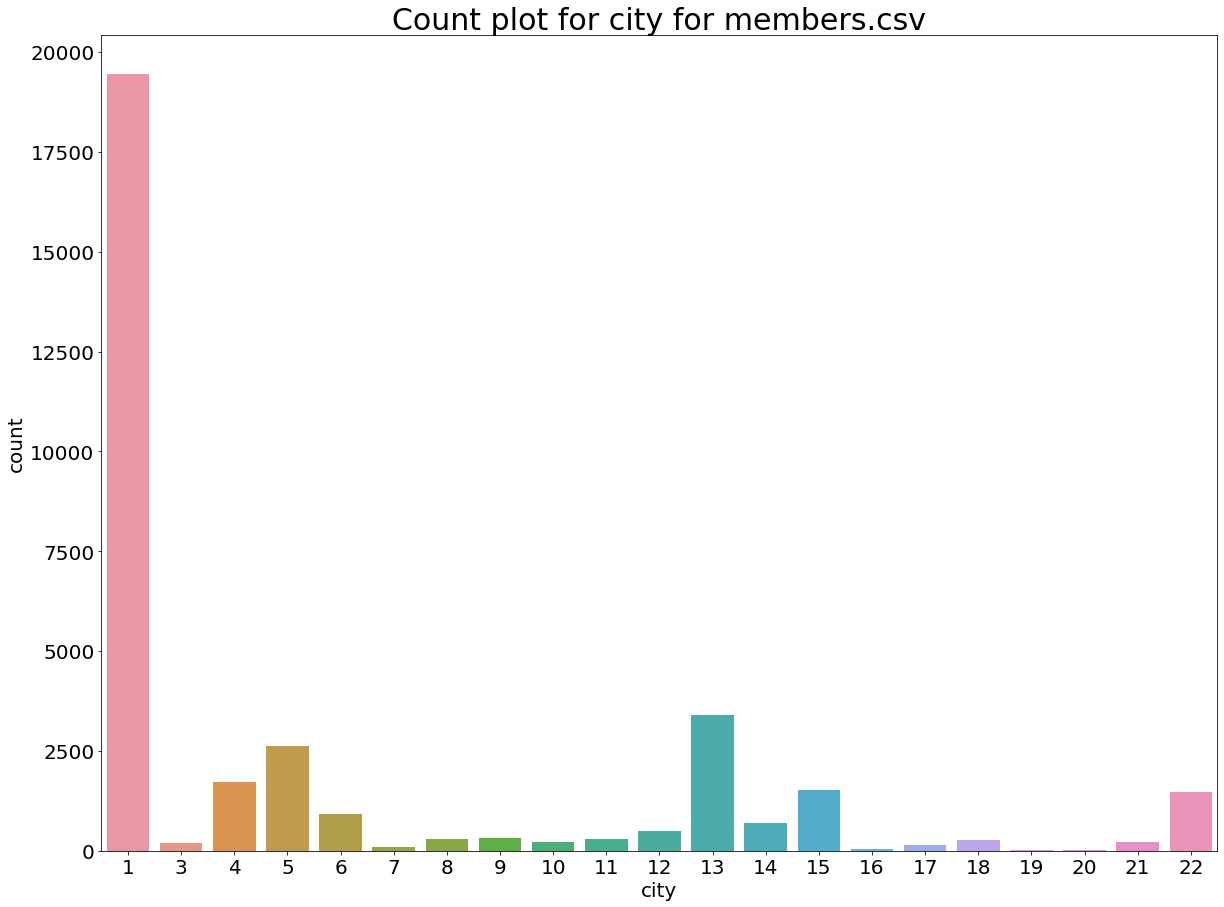

In [ ]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='city', data = members) 
#plt.xticks(rotation='45')
plt.title('Count plot for city for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

##**From above count plot we can most of the user belong to city 1 and least user belong to city 19,20**

#**Count plot for registered_via column**

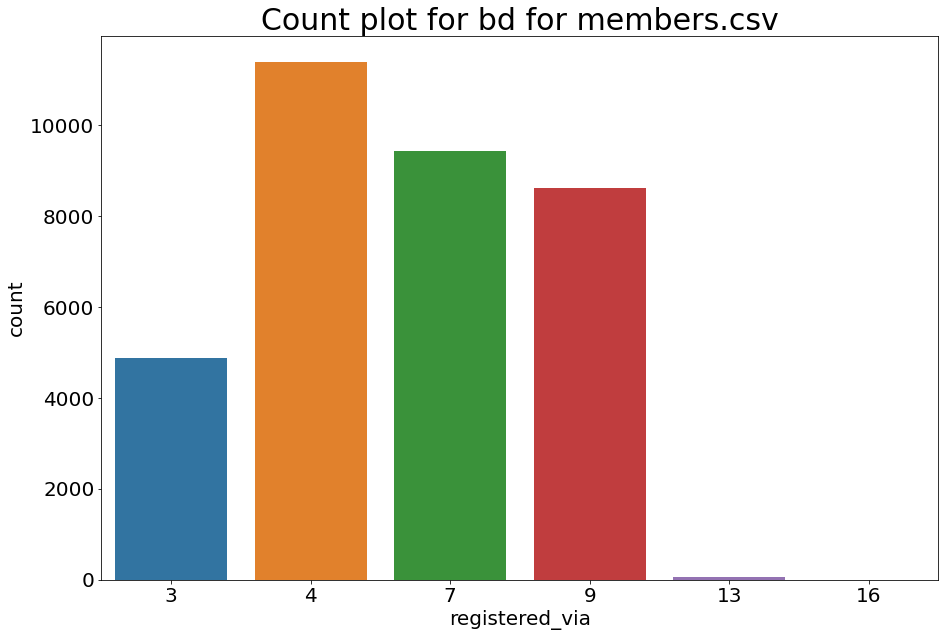

In [ ]:
plt.figure(figsize=(15,10))
# count plot on single categorical variable 
sns.countplot(x ='registered_via', data = members) 
#plt.xticks(rotation='45')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

###**From above plot we can make conclusion that most of the user is registered via 4,7,9**

In [ ]:
members["registration_init_time"].head()

0    20110820
1    20150628
2    20160411
3    20150906
4    20170126
Name: registration_init_time, dtype: int64

In [ ]:
members["expiration_date"].head()

0    20170920
1    20170622
2    20170712
3    20150907
4    20170613
Name: expiration_date, dtype: int64

###From above output we can see that registration_init_time and expiration_date is not in readable for formate so lets convert this into date format

In [ ]:
import pandas as pd
import numpy as np 
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [ ]:
members["registration_init_time"].head()
members["expiration_date"].head()


0   2017-09-20
1   2017-06-22
2   2017-07-12
3   2015-09-07
4   2017-06-13
Name: expiration_date, dtype: datetime64[ns]

###Now its in readable format lets plot count plot for this

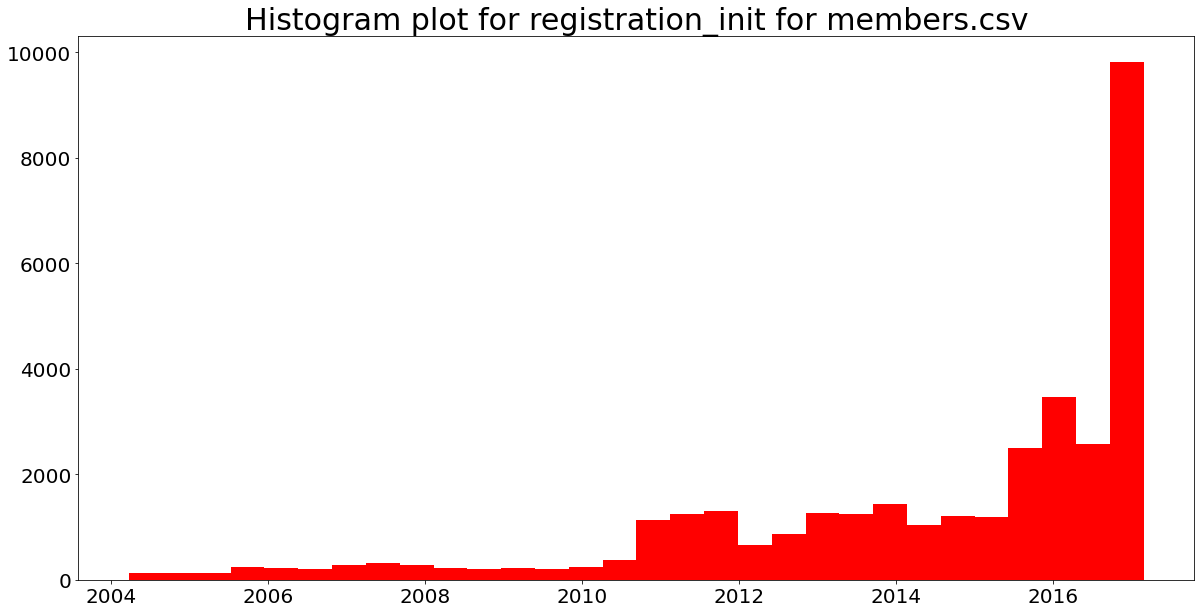

In [ ]:
plt.figure(figsize=(20,10))
# count plot on single categorical variable 
plt.hist(members["registration_init_time"],bins=30,color='red')
#plt.xticks(rotation='45')
plt.title('Histogram plot for registration_init for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

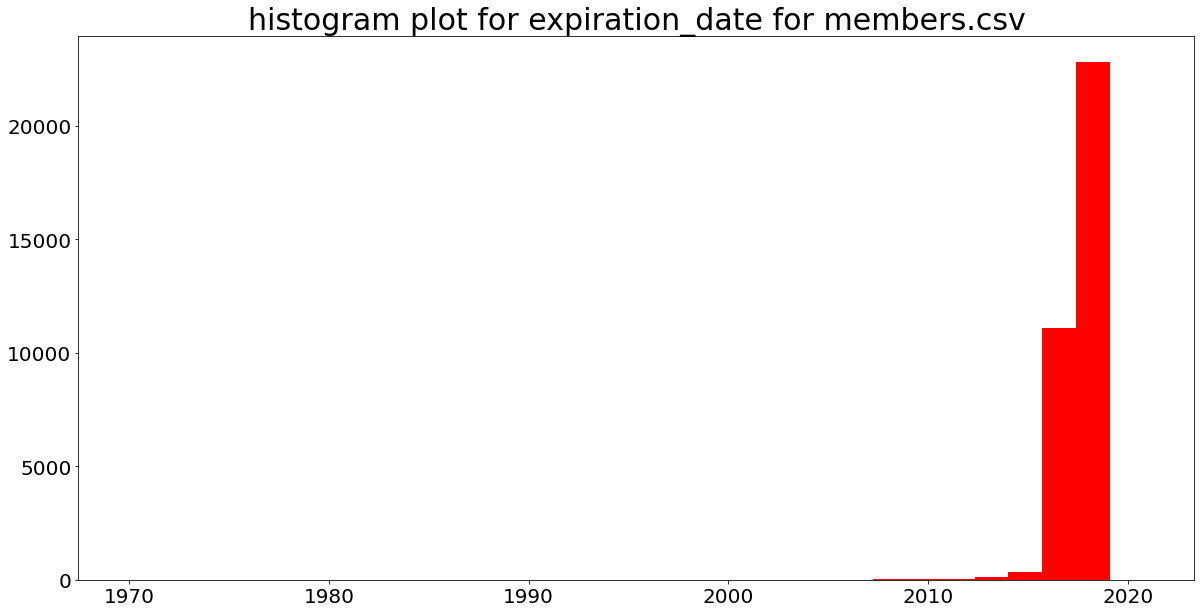

In [ ]:
plt.figure(figsize=(20,10))
# count plot on single categorical variable 
plt.hist(members["expiration_date"],bins=30,color='red')
#plt.xticks(rotation='45')
plt.title('histogram plot for expiration_date for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

###From above histogram plot for registration_init time and expiration_date we can make conclusion that most of user registere during 2016 so their expiration date is near 2020

##**song_extra.csv**
**This file contain song extra information**

1.   song_id ------> basically  unique_id of each songs
2.   name ----------> name of the songs
3.   isrc -------------> International Standard Recording Code used to identify songs


In [ ]:
song_extra.head() # Displaying top 5 data frames in song_exta csv file

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


##**songs.csv**
**This file contain songs information**

1.   song_id ------------> basically unique_id of each songs
2.   song_length -----> duration of songs
3.   genre_ids ---------> genre id 
4.   artist_name -----> name of singer
5.   composer --------> name of the composer
6.   lyricist --------------> name of the song writer
7.   language ----------> language in which song was recorded



In [ ]:
songs.head() # Displaying top 5 data frames in song_exta csv file

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


###The song_length is given in milliseconds so get better understanding lets first convert this into minutes because most songs in real world is in minutes

In [ ]:
from tqdm import tqdm
lst=[]
for i in tqdm(songs["song_length"]):
  minutes = ((i/(1000*60))%60)
  minutes = round(minutes)
  lst.append(minutes)

100%|██████████| 2296320/2296320 [00:01<00:00, 1465383.44it/s]


In [ ]:
songs["song_duration_minutes"]=lst

In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,4
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,3
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,4
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,5
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,2


Text(0.5, 1.0, 'PDF for song_duration_minutes')

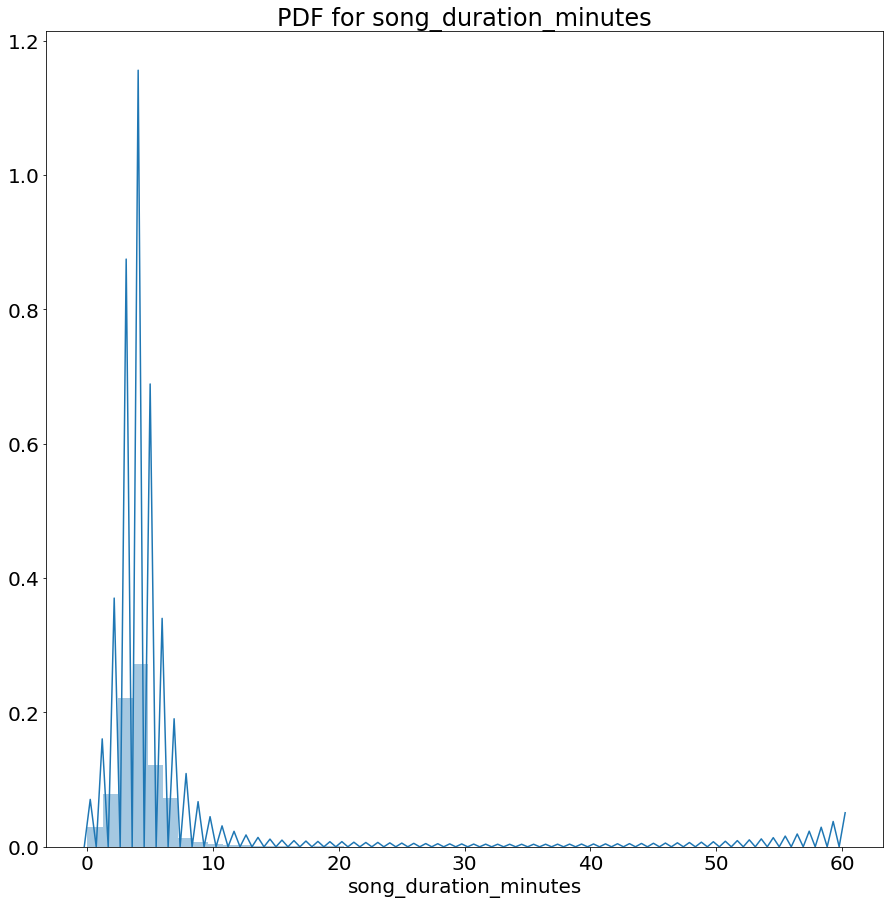

In [ ]:
plt.figure(figsize = (15, 15)) 
sns.distplot(songs.song_duration_minutes)
sns.set(font_scale=2)
plt.title('PDF for song_duration_minutes')

In [ ]:
count1=0
for i in songs["song_duration_minutes"]:
  if i<=10 and i>0:
    count1+=1
percentage1=(count1/len(songs["song_duration_minutes"]))*100
percentage1=round(percentage1)
print(percentage1,"% of song length is between 1 and 10")

98 % of song length is between 1 and 10


###From above pdf and output we can see that 98% of song length is between 1-10

In [ ]:
"""plt.figure(figsize = (15, 15)) 
sns.distplot(songs.genre_ids)
sns.set(font_scale=2)
plt.title('PDF for genre id')"""
count=0
for i in songs["genre_ids"]:
  if i=='864|857|850|843':
   count+=1
print("Total count for '864|857|850|843' in genre_ids column : ",count)

Total count for '864|857|850|843' in genre_ids column :  6842


###From above output we can see there is 6842 incorrect data in genre_ids which needs to be preprocessed in preprocessing steps

In [ ]:
lst1=[]
for i in songs["genre_ids"]:
  if i != '864|857|850|843':
    lst1.append(i)
print(lst1[:10])



['465', '444', '465', '465', '726', '458', '465', '465', '352|1995', '2157']


###From above output we can see that there are more values with '|' symbol so lets find out how many values contain this symbol

In [ ]:
songs["genre_ids"]=songs["genre_ids"].astype(str) #converting to str dtype

###Finding count of values containing special character

In [ ]:
import re
word = 'asdf*'
special_char=0
regexp = re.compile('[^0-9a-zA-Z]+')
for i in songs["genre_ids"]:
  if regexp.search(i):
    special_char+=1

print("Total count of values containing special character '|' in genre_ids column         : ",special_char)
print("Total percentage for values containing special character '|'  in genre_ids column  : ",(special_char/len(songs["genre_ids"]))*100,"%")

Total count of values containing special character '|' in genre_ids column         :  172876
Total percentage for values containing special character '|'  in genre_ids column  :  7.528393255295429 %



We can se that 7.5% of values contain special character '|' which should be removed during pre-processing step

In [ ]:
count1 = songs["genre_ids"].isnull().sum()
print("Total count of gender column of members                   :  ",len(songs["genre_ids"]))
print("Number of NaN value in gender column of members           :  ",count1)
print("Number of non-NaN value in gender coumn of members        :  ",(len(songs["genre_ids"])-count1))
print("-----------------------------------------------------------------------")


Total count of gender column of members                   :   2296320
Number of NaN value in gender column of members           :   0
Number of non-NaN value in gender coumn of members        :   2296320
-----------------------------------------------------------------------


#From above output we can see that there no NaN value availabe in genre_id in songs colimn

###As we know that we have two **.csv** file which contain information of songs so we can merge both of them

In [ ]:
song_info = song_extra.merge(songs, on='song_id', how='left') #merging song_extra.csv and songs.csv

In [ ]:
song_info.head()

,song_id,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,307304.0,458,愛上巧克力 原聲帶,An-An Tso,NaN,3.0,5.0
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,205914.0,1609,DJ Snake,Justin Bieber| William Grigahcine| Andrew Watt...,NaN,52.0,3.0
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,252160.0,465,蕭敬騰 (Jam Hsiao),A Qin,A Qin| Chen Tian You| Wu Yi Wei,3.0,4.0
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,175427.0,465,MKTO,Evan Bogart|Andrew Goldstein|Lindy Robbins|Ema...,Evan Bogart|Andrew Goldstein|Lindy Robbins|Ema...,52.0,3.0
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,294983.0,458,羅志祥 (Show Lo),Drew Ryan Scott / David Moses Jassy / Niclas M...,Drew Ryan Scott / David Moses Jassy / Niclas M...,3.0,5.0


In [ ]:
from collections import Counter 
import pandas as pd  
d = Counter(song_info["genre_ids"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['genre_id','count'])
print(df.head(50))

           genre_id   count
0               465  567699
1               958  176290
2              2022  168805
3              1609  166399
4              2122  139873
5              1259  101440
6               nan   94073
7               921   67561
8              1152   48713
9               359   43584
10              786   42989
11              726   34955
12              139   34871
13             1011   33999
14              940   33474
15         1572|275   24323
16             1955   20970
17              691   19468
18      139|125|109   17601
19              873   17533
20              437   17202
21              947   17099
22              388   16770
23              458   15434
24              444   14853
25             1616   14186
26              242   13748
27              451   13281
28              880   13053
29              423   11804
30              829   11752
31             2130   11049
32             1138   10767
33             1180   10700
34        1616|2058 

In [ ]:
df.describe()

,count
count,1047.000000
mean,2192.904489
std,21063.057511
min,1.000000
25%,3.000000
50%,13.000000
75%,101.500000
max,567699.000000


###We can there is data with special caharcter "|" and their count is large so we cant just replace with zero , what we can do is to replace all these value with mean or as data is in this format 864|857|850|843 so we can keep first int value and discard all other values

###finding percentage of NaN value in all column

In [ ]:
print("Total percentage for NaN value in song_id column        : ",(song_info["song_id"].isna().sum()/len(song_info["song_id"]))*100,"%")
print("Total percentage for NaN value in name column           : ",(song_info["name"].isna().sum()/len(song_info["name"]))*100,"%")
print("Total percentage for NaN value in isrc column           : ",(song_info["isrc"].isna().sum()/len(song_info["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column    : ",(song_info["song_length"].isna().sum()/len(song_info["song_length"]))*100,"%")
print("Total percentage for NaN value in genre_ids column      : ",(song_info["genre_ids"].isna().sum()/len(song_info["genre_ids"]))*100,"%")


print("Total percentage for NaN value in artist_name column    : ",(song_info["artist_name"].isna().sum()/len(song_info["artist_name"]))*100,"%")
print("Total percentage for NaN value in composer column       : ",(song_info["composer"].isna().sum()/len(song_info["composer"]))*100,"%")
print("Total percentage for NaN value in lyricist column       : ",(song_info["lyricist"].isna().sum()/len(song_info["lyricist"]))*100,"%")
print("Total percentage for NaN value in language column       : ",(song_info["language"].isna().sum()/len(song_info["language"]))*100,"%")



Total percentage for NaN value in song_id column        :  0.0 %
Total percentage for NaN value in name column           :  8.710911418306241e-05 %
Total percentage for NaN value in isrc column           :  5.9472876617344035 %
Total percentage for NaN value in song_length column    :  0.023911451843250633 %
Total percentage for NaN value in genre_ids column      :  0.023911451843250633 %
Total percentage for NaN value in artist_name column    :  0.023911451843250633 %
Total percentage for NaN value in composer column       :  46.6681417143335 %
Total percentage for NaN value in lyricist column       :  84.71674947113878 %
Total percentage for NaN value in language column       :  0.023955006400342163 %


###From above output we can see that composer ,lyricist have highest percent of NaNvalue as 46%,84%

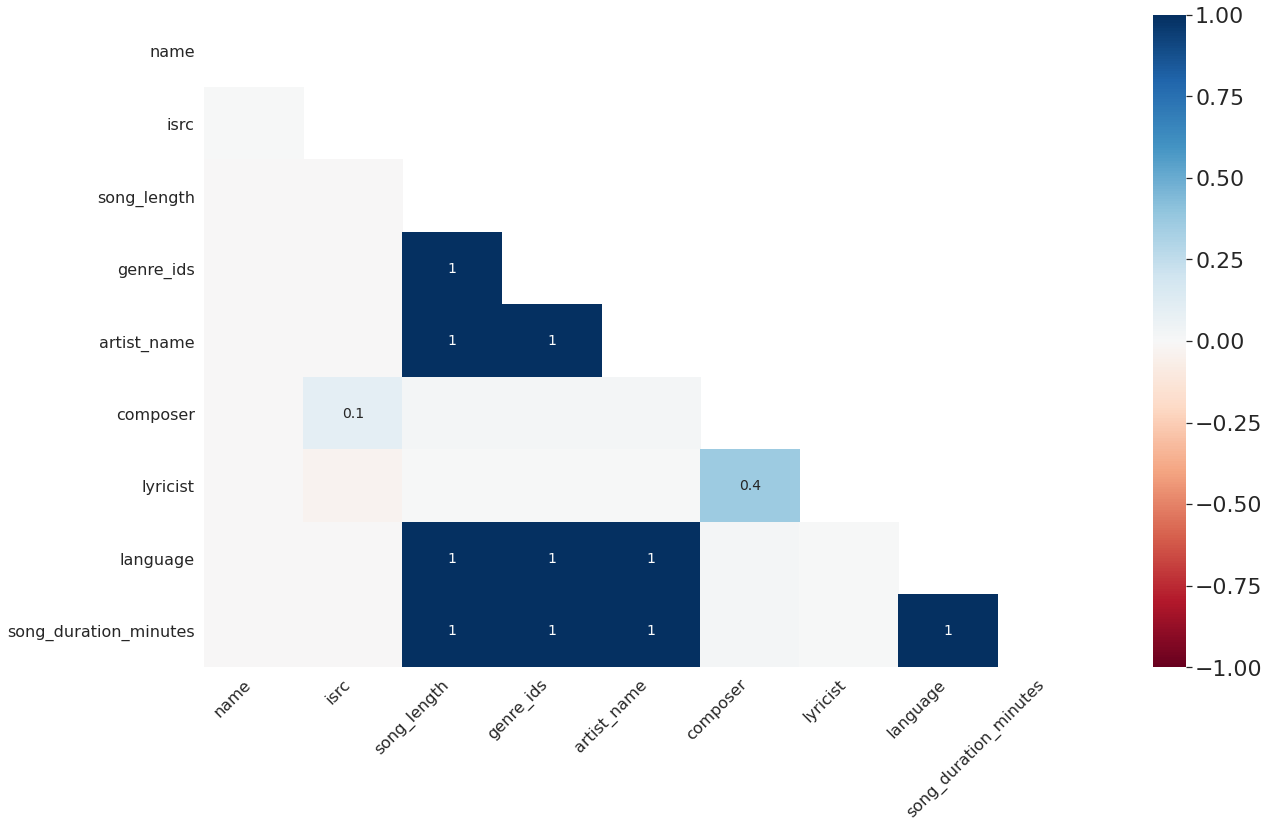

In [ ]:
msn.heatmap(song_info)

###From above heatmap also we can see that lyricist and composer have highest number of NaN values

##**train.csv**
**This file contain train data information**

1.   msno ---------------------------> basically user_id
2.   song_id ------------------------> unique id of each songs
3.   source_system_tab ---------> where the event was triggered
4.   surce_screen_name --------> name of the screen user sees
5.   source_type -------------------> from which source  does song has been listened
6.   target ----------------------------> 1 means there is a recurring listening event(s)     triggered within a month after the user’s a very first observable listening event, target=0 otherwise



In [ ]:
train.head() # Displaying top 5 data frames in train csv file

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


#**train.csv**

Text(0.5, 1.0, 'Count plot for system tab there are using')

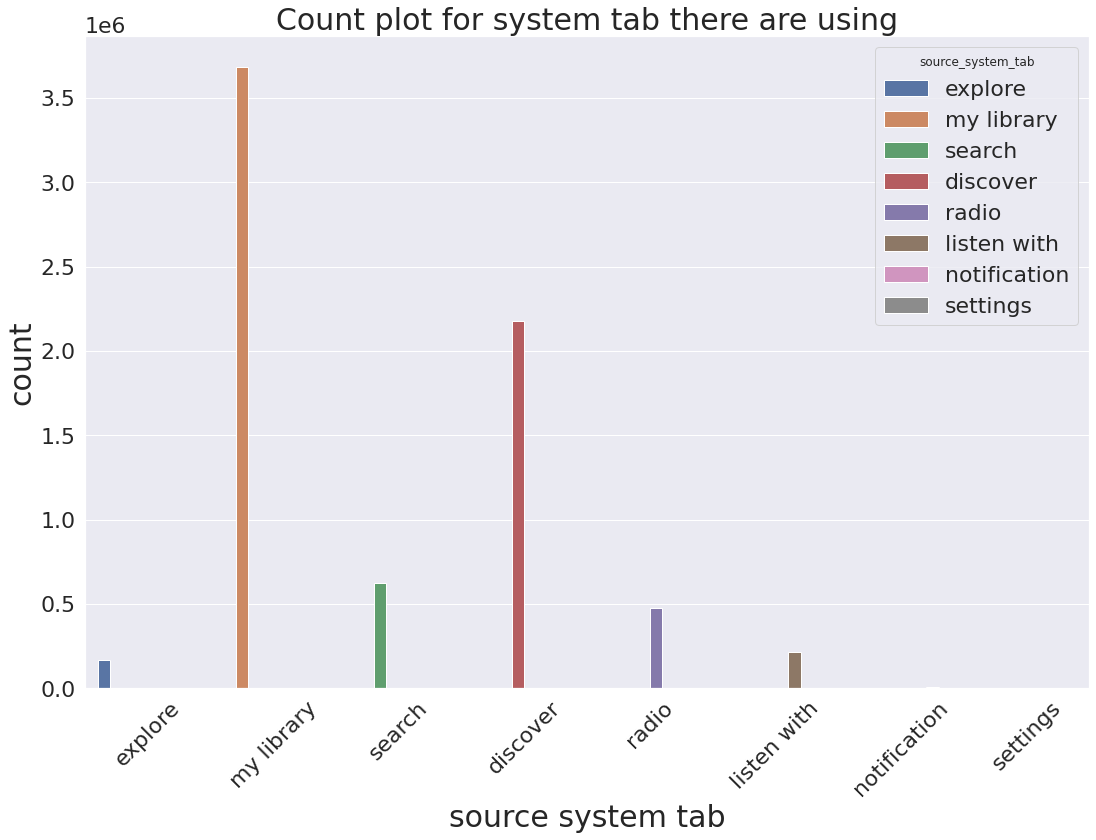

In [ ]:
#https://www.kaggle.com/rohandx1996/recommendation-system-with-83-accuracy-lgbm
plt.figure(figsize=(18,12))
sns.set(font_scale=2)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)
#sns.set(style="darkgrid")
plt.xlabel('source system tab',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=30)

In [ ]:
print("Total percentage for NaN value in source_system_tab column  : ",(train["source_system_tab"].isna().sum()/len(train["source_system_tab"]))*100,"%")

Total percentage for NaN value in source_system_tab column  :  0.3368251602389888 %


From above plot we can see that most of the user prefer to listen from my library then from discover which means user love to listen song from library and there are people who love listen new discovered songs and there is only 0.3% percent of values are NaN

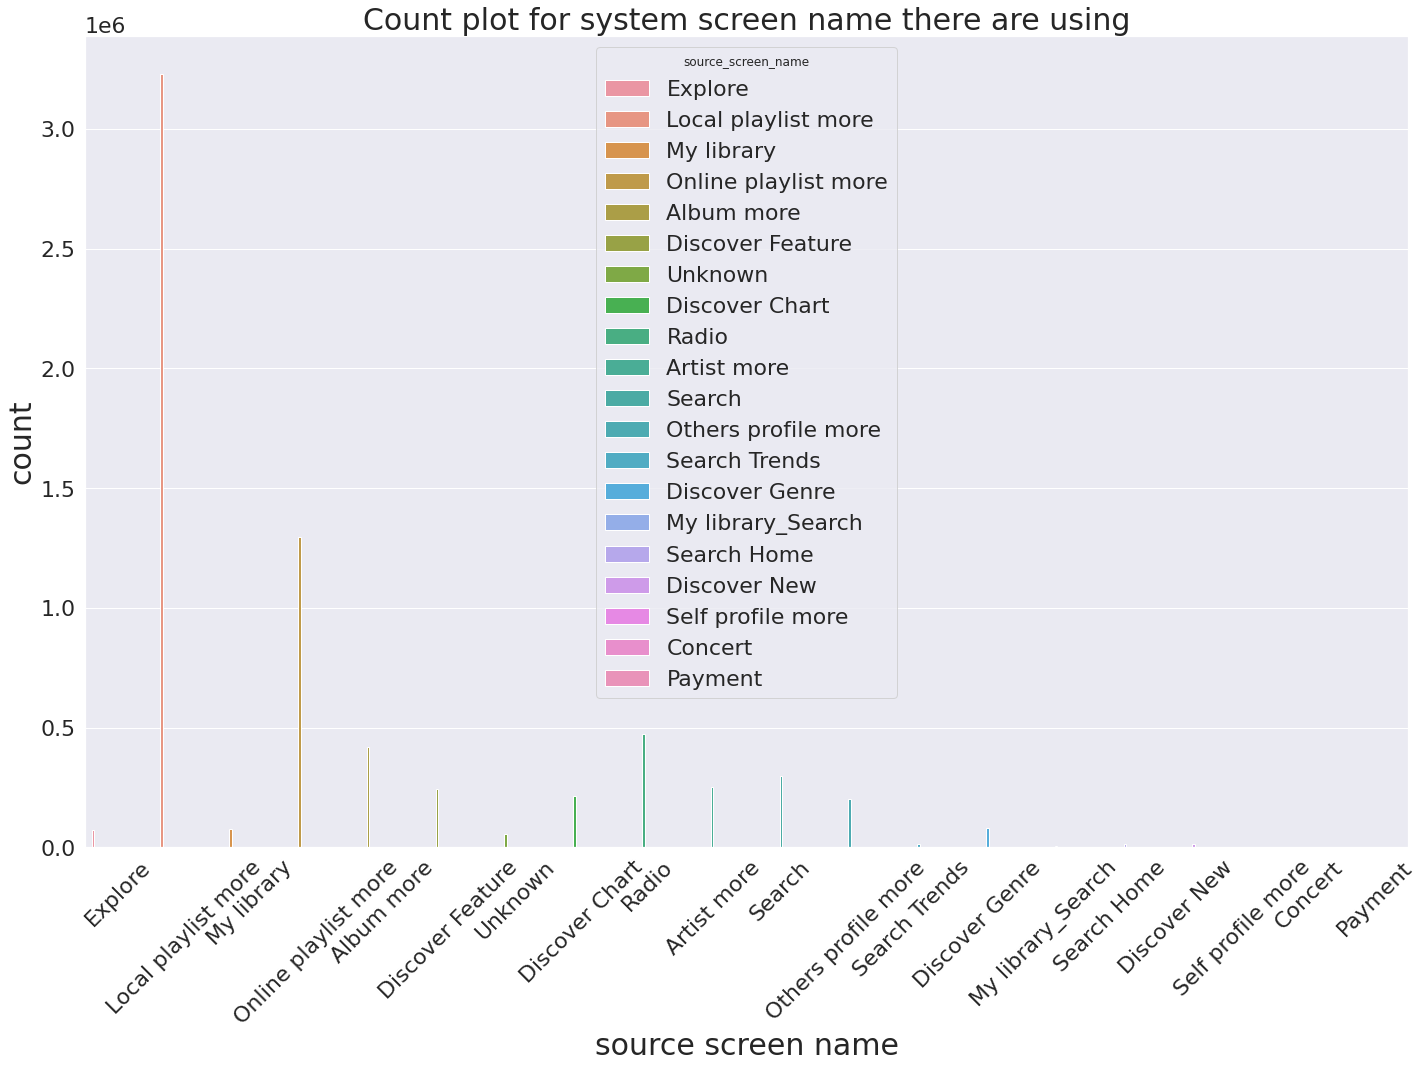

In [ ]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_screen_name',hue='source_screen_name',data=train)
sns.set(style="darkgrid")
plt.xlabel('source screen name',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system screen name there are using',fontsize=30)
plt.tight_layout()

In [ ]:
print("Total percentage for NaN value in source_screen_name column  : ",(train["source_screen_name"].isna().sum()/len(train["source_screen_name"]))*100,"%")

Total percentage for NaN value in source_screen_name column  :  5.622617560778039 %



from above plot we can see that most of the user prefer to listen from local playlist and there is only 5.6% values that are NaN

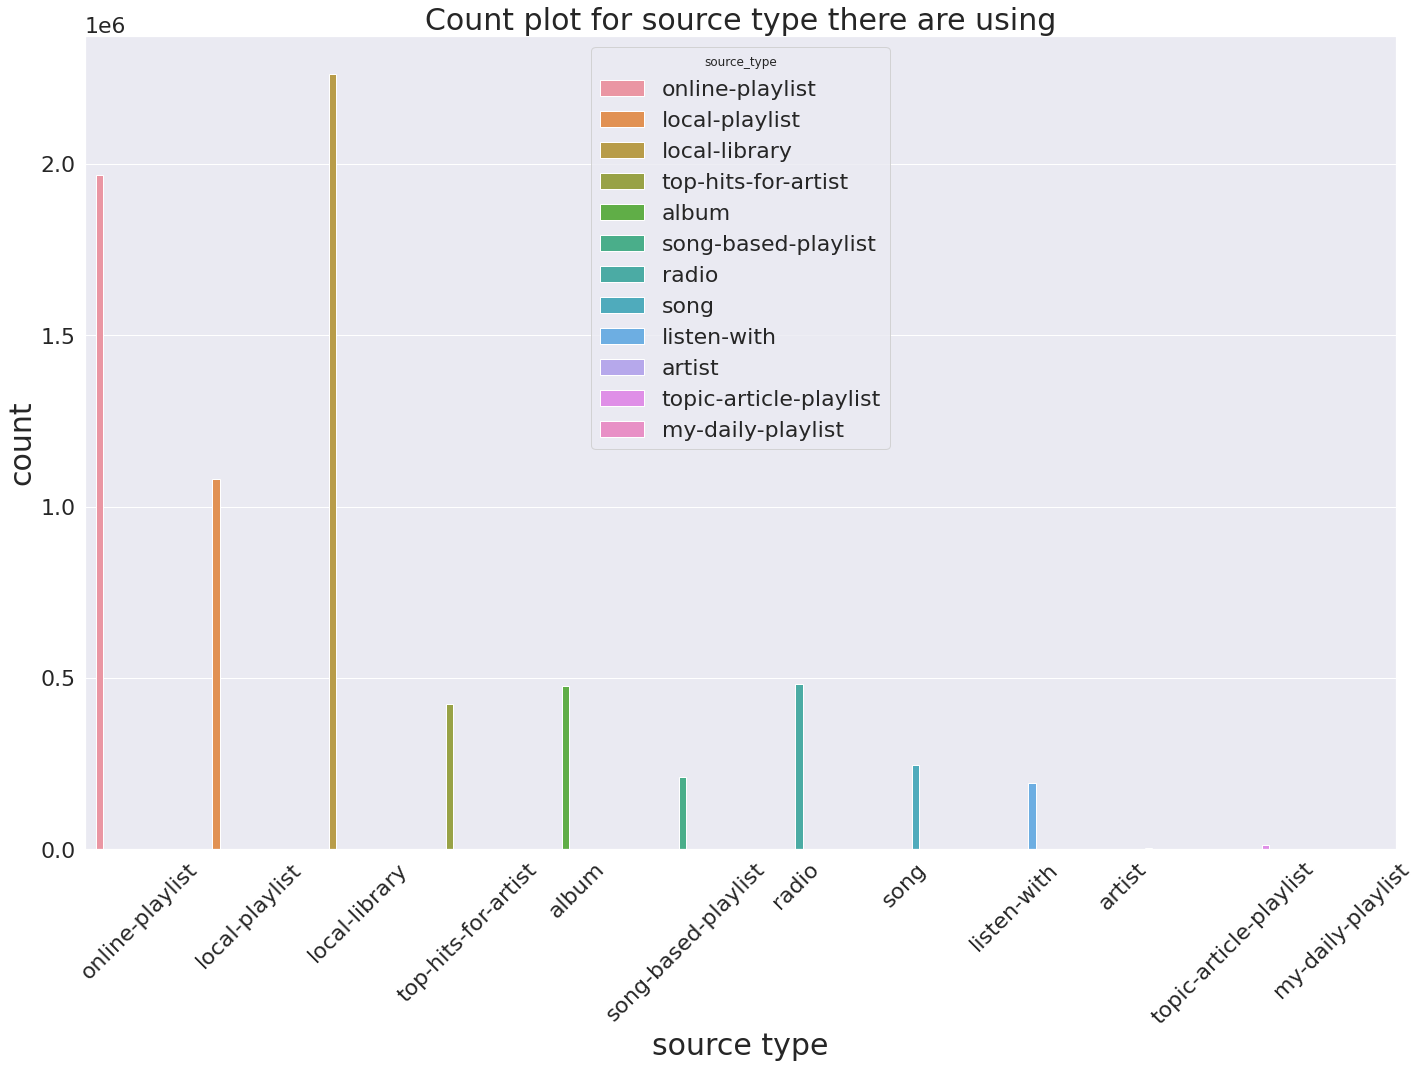

In [ ]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source type',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for source type there are using',fontsize=30)
plt.tight_layout()

In [ ]:
print("Total percentage for NaN value in source_type column  : ",(train["source_type"].isna().sum()/len(train["source_type"]))*100,"%")

Total percentage for NaN value in source_type column  :  0.2919585144829804 %



from above plot we can see that most of the user prefer to listen from mloca library then then users prefer online playlist and there is only 0.2% values are NaN

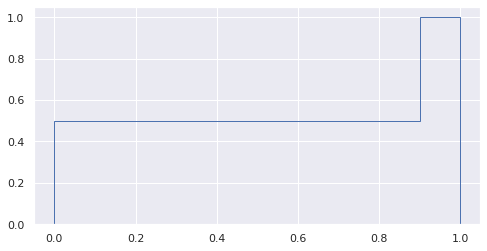

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(train["target"], 10, density=True, histtype='step',
                           cumulative=True, label='Empirical')


In [ ]:
print("Total percentage for NaN value in target column  : ",(train["target"].isna().sum()/len(train["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0 %


###Finding percentage of duplicate user id and song id

In [ ]:
duplicate_values = len(train["msno"])-train["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train["msno"]))*100,"%")

Total no of duplicate user id         :  7346663
Total percentage of duplicate user id :  99.58311973104954 %


In [ ]:
duplicate_values1 = len(train["song_id"])-train["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train["song_id"]))*100,"%")

Total no of duplicate song id         :  7017452
Total percentage of duplicate song id :  95.12070483196153 %


###From above output we can see that there is 99% duplicate user and 95% duplicate songs are available in **train.csv** so from this we can make conclusion that there is huge number of user who listen to same song repeatedly

###As we know **train.csv** contain msno and **song_id** which means songs information as well as members can be merged into it


###**Merging train.csv with song_info.csv and members.csv**

In [ ]:
train_and_members = pd.merge(train, members, on='msno', how='left')
final_train       = pd.merge(train_and_members, song_info, on='song_id', how='left')

In [ ]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,2012-01-02,2017-10-05,Good Grief,GBUM71602854,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,3.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,2011-05-25,2017-09-11,Lords of Cardboard,US3C69910183,284584.0,1259,Various Artists,NaN,NaN,52.0,5.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,2011-05-25,2017-09-11,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,4.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,2011-05-25,2017-09-11,Disco Africa,GBUQH1000063,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,4.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,2012-01-02,2017-10-05,Sleep Without You,QM3E21606003,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,3.0


##**language**

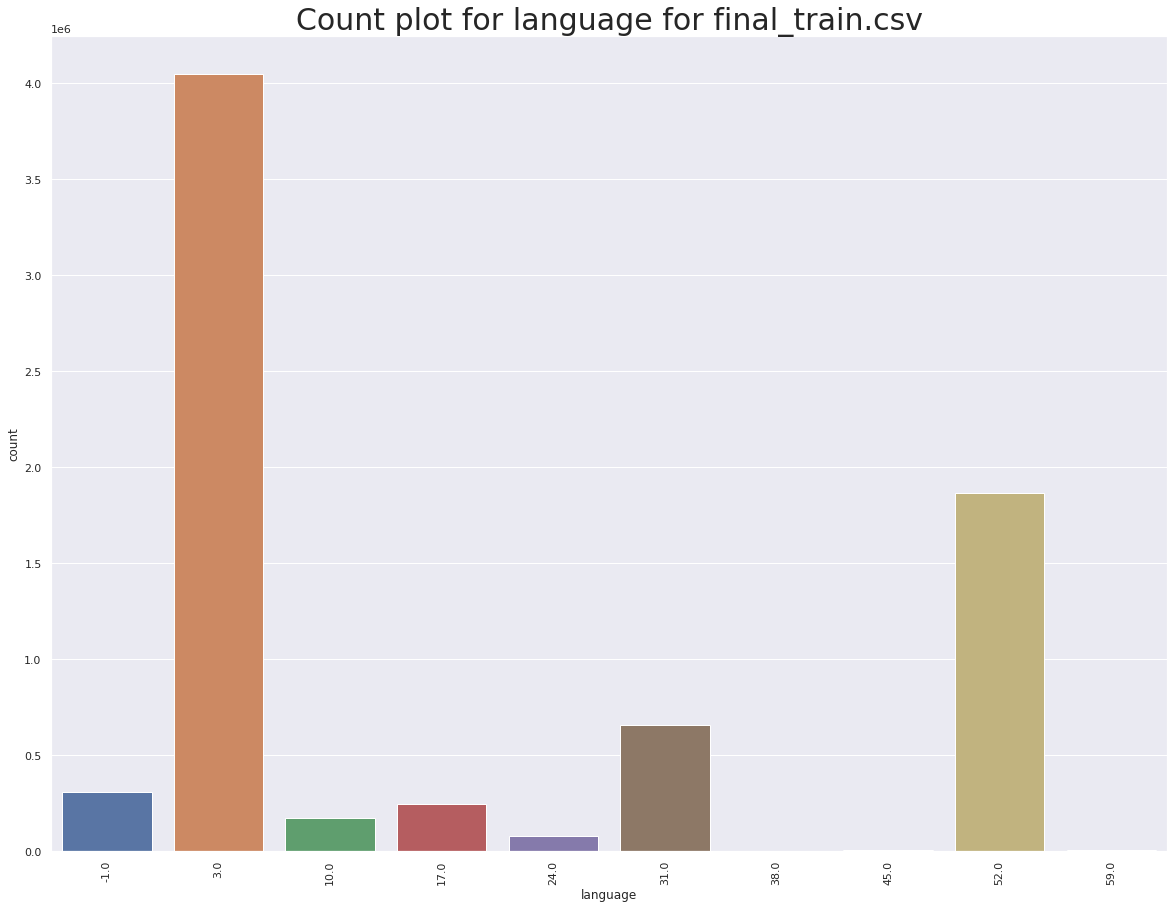

In [ ]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='language', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for language for final_train.csv',fontsize=30)
  
# Show the plot 
plt.show() 

###From above count plot we can see that most preferred language is 3 and 52 this observation indicate that population of user with language 3 and 52 are very high in the region where kkBox music streaming platform is used

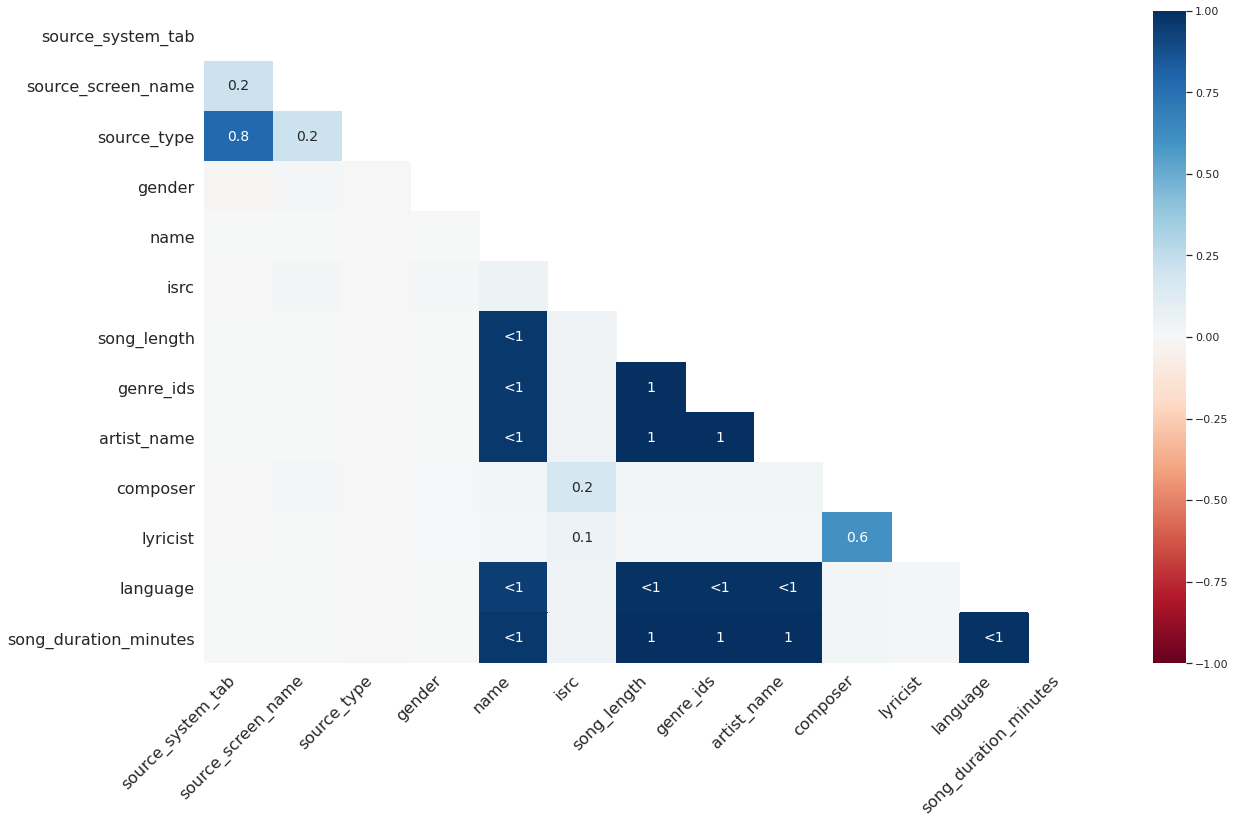

In [ ]:
#https://github.com/ResidentMario/missingno/blob/master/README.md
msn.heatmap(final_train)

###.From above heatmap we can say that composer,lyricist,isrc,name has highest number of missing value
###.composer and lyricist have strong correlation between them and 
###.source_system_tab and souce_type also has strong correlation between them

In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
print("Total percentage for NaN value in source_system_tab column   : ",(test["source_system_tab"].isna().sum()/len(test["source_system_tab"]))*100,"%")
print("Total percentage for NaN value in source_screen_name column  : ",(test["source_screen_name"].isna().sum()/len(test["source_screen_name"]))*100,"%")
print("Total percentage for NaN value in source_type column         : ",(test["source_type"].isna().sum()/len(test["source_type"]))*100,"%")
print("Total percentage for NaN value in song_id column             : ",(test["song_id"].isna().sum()/len(test["song_id"]))*100,"%")
print("Total percentage for NaN value in msno column                : ",(test["msno"].isna().sum()/len(test["msno"]))*100,"%")

Total percentage for NaN value in source_system_tab column   :  0.3301796393133578 %
Total percentage for NaN value in source_screen_name column  :  6.370605329338741 %
Total percentage for NaN value in source_type column         :  0.28539692348608997 %
Total percentage for NaN value in song_id column             :  0.0 %
Total percentage for NaN value in msno column                :  0.0 %


#**SUMMARY OF EDA**

*   We have Performed EDA using different types data visualization techniques such box plot,bar plot, histogram plot,pdf etc..,,
*   We have found percentage of missing value such as NaN,nan,0 and special symbol.
*   we have found feature which are important for prediction.
*   We have converted song_length to minutes and date_of_registration and expiration to date_time format.





---------



##**Feature engineering**
The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.

— Luca Massaron
Basically to do any ML problem we need data which we feed to our ML algorithm and to proper output it need appropriate data as input so there is need to genererate or find usefull feature from existing data is called feature engineering


**Note:-**

Features: data comprises of rows and column these rows and coulmn are basically our featurs

#**Numerical Imputation**
it means filling missing values with appropriate value as in our data set we have seen that bd and geneder column of menmbers.csv have many missing value

#**Filling missing value**

##**Gender**

###As we know we have 57.850 % NaN value in gender column and as it is categorical feature we can impute NaN value with gender_not_available

In [ ]:
from numpy import nan
# mark zero values as missing or NaN
# fill missing values with mean column values
final_train["gender"].fillna("gender_not_available", inplace=True)
# count the number of NaN values in each column


##**making sure all mising values of gender column is filled**

In [ ]:
print(final_train["gender"].isnull().sum())

0


###We know in bd column we hav 50% value as zero and there are some extreme value so we can fill these value with mean of whole data

In [ ]:
final_train["bd"].fillna(members["bd"].mean(), inplace=True)
# count the number of NaN values in each column
print(members["bd"].isnull().sum())

0


In [ ]:
bd_c=0
for i in final_train["bd"]:
  if i<0 and i>80:
    bd_c+=1
print(bd_c)



0


###All NaN values are filled but we are left 2940499 zero's so now lets fill these zero's with mean 

In [ ]:
from numpy import nan
final_train["bd"]=final_train["bd"].mask(final_train["bd"]==0).fillna(final_train["bd"].mean())

In [ ]:
final_train["bd"]=final_train["bd"].round()

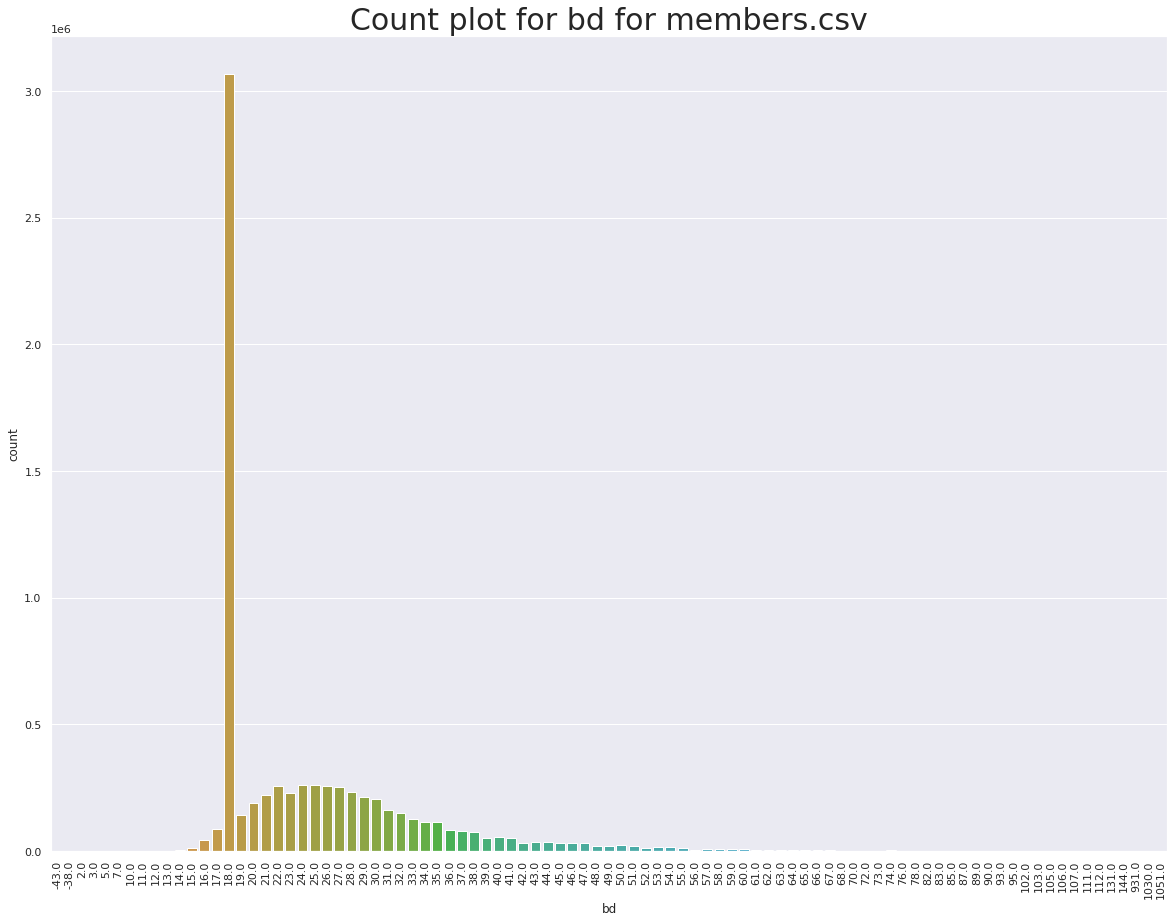

In [ ]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='bd', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

###From above count plot we can see that most of user has age 18 and after that we can see 90% of user age is between 15-50

##**Genre_id**

###From above EDA we know that genre_id has values which has special character " | " so it also contain 'nan' value so first we handle values with special character then we will fill 'nan' with median

In [ ]:
final_train["genre_ids"]=final_train["genre_ids"].astype(str)

In [ ]:
import re 
lst=[]
for i in final_train["genre_ids"]:
  res = re.findall(r"[\w']+",i) #finding values with special charcter " | "
  lst.append(res[0]) #appending first value from resultant list


In [ ]:
final_train["genre_id"]=lst #adding new column as genre_id and appending list we which clean from special character

In [ ]:
final_train = final_train.drop(columns="genre_ids") #dropping existing genre_ids column
final_train = final_train.drop(columns="song_length")

In [ ]:
final_train["genre_id"]=final_train["genre_id"].replace("nan", '0') #replacing "nan" value with 0 so that we can convert genre_id column to int type inorder to find median value

In [ ]:
final_train["genre_id"]=pd.to_numeric(final_train["genre_id"]) #converting genre_id to numeric type

In [ ]:
import statistics

median_genre_id=int(statistics.median(final_train["genre_id"])) #finding median value 

In [ ]:
print(median_genre_id)

465


In [ ]:
final_train["genre_id"]=final_train["genre_id"].replace(0,median_genre_id ) #replacing 0 with median

In [ ]:
final_train["genre_id"].head(50) #printing 50 values of genre_id column inorder to make sure  data is cleaned

0      359
1     1259
2     1259
3     1019
4     1011
5     1259
6      465
7     1011
8     2022
9      465
10     465
11     465
12     465
13     458
14     465
15     465
16     465
17     458
18     465
19     465
20     458
21     465
22     465
23    2022
24    2022
25    2022
26     465
27     465
28     465
29     465
30     465
31     465
32    1259
33     458
34     465
35     465
36    1609
37     423
38     465
39     465
40     465
41     465
42     921
43     465
44     465
45     451
46     458
47     458
48     458
49     458
Name: genre_id, dtype: int64

###From above output we can see that now we don't have any "nan" and value with special character " | "

In [ ]:
final_train["language"].isna().sum()

1605

###We can see there is 1605 NaN values availabe in language column so we will impute these NaN with median of column values

In [ ]:
import statistics
median_lang=round(statistics.median(final_train["language"])) #finding median value 

In [ ]:
print(median_lang)

3


In [ ]:
from numpy import nan
final_train["language"].fillna(median_lang, inplace=True)

In [ ]:
final_train["language"].isna().sum()

0

###Now there is no NaN value is available in language column

###Filling NaN values of name , isrc, composer, lyricist, srtist_name

In [ ]:
final_train["name"].fillna("name_not_available", inplace=True)
final_train["isrc"].fillna("isrc_not_available", inplace=True)
final_train["artist_name"].fillna("artist_not_available", inplace=True)

final_train["source_system_tab"].fillna("data_not_available", inplace=True)
final_train["source_screen_name"].fillna("data_not_available", inplace=True)
final_train["source_type"].fillna("data_not_available", inplace=True)

In [ ]:
print("Total percentage for NaN value in name column                    : ",(final_train["name"].isna().sum()/len(final_train["name"]))*100,"%")
print("Total percentage for NaN value in isrc column                    : ",(final_train["isrc"].isna().sum()/len(final_train["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column             : ",(round((final_train["song_duration_minutes"].isna().sum()/len(final_train["song_duration_minutes"]))*100)),"%")


print("Total percentage for NaN value in artist_name column             : ",(final_train["artist_name"].isna().sum()/len(final_train["artist_name"]))*100,"%")


print("Total percentage for NaN value in source_system_tab column       : ",(final_train["source_system_tab"].isna().sum()/len(final_train["source_system_tab"]))*100,"%")
print("Total percentage for NaN value in source_screen_name column      : ",(final_train["source_screen_name"].isna().sum()/len(final_train["source_screen_name"]))*100,"%")
print("Total percentage for NaN value in source_type column             : ",(final_train["source_type"].isna().sum()/len(final_train["source_type"]))*100,"%")

Total percentage for NaN value in name column                    :  0.0 %
Total percentage for NaN value in isrc column                    :  0.0 %
Total percentage for NaN value in song_length column             :  0.0 %
Total percentage for NaN value in artist_name column             :  0.0 %
Total percentage for NaN value in source_system_tab column       :  0.0 %
Total percentage for NaN value in source_screen_name column      :  0.0 %
Total percentage for NaN value in source_type column             :  0.0 %


###We know that composer and lyricist have highest NaN value and becuase it is textual feature we can't impute these feature with mean and median and in same place these feature will not be usefull for us so we can drop these two feature and we have two feature repeated as song_length and genre_ids

In [ ]:
final_train.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,artist_name,composer,lyricist,language,song_duration_minutes,genre_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,2012-01-02,2017-10-05,Good Grief,GBUM71602854,Bastille,Dan Smith| Mark Crew,NaN,52.0,3.0,359
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Lords of Cardboard,US3C69910183,Various Artists,NaN,NaN,52.0,5.0,1259


In [ ]:
final_train = final_train.drop(["composer","lyricist"],axis=1)

###From above output we can see that there is NaN value is avalable. We have succesfully imputed missing values 

##**test.csv**
**This file contain test data information**

1.   msno ---------------------------> basically user_id
2.   song_id ------------------------> unique id of each songs
3.   source_system_tab ------> where the event was triggered
4.   surce_screen_name -----> name of the screen user sees
5.   source_type ------------------> from which source  does song has been listened



In [ ]:
test_members = pd.merge(test, members, on='msno', how='left')
final_test   = pd.merge(test_members, song_info, on='song_id', how='left')

In [ ]:
final_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,1,0,NaN,7,2016-02-19,2017-09-18,愛其實很殘忍,TWUM71400047,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,4.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,1,0,NaN,7,2016-02-19,2017-09-18,她說,TWB671005201,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,5.0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,1,0,NaN,4,2016-11-17,2016-11-24,subarashiki nichijo,JPWP01070260,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,5.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,3,30,male,9,2007-07-25,2017-04-30,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,5.0
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,3,30,male,9,2007-07-25,2017-04-30,Om Yoga,ITO101121898,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,3.0


##**finding and handling missing values of song.csv**

In [ ]:
print(final_test.isnull().sum())

id                              0
msno                            0
song_id                         0
source_system_tab            8442
source_screen_name         162883
source_type                  7297
city                            0
bd                              0
gender                    1052224
registered_via                  0
registration_init_time          0
expiration_date                 0
name                          778
isrc                       196643
song_length                   796
genre_ids                     796
artist_name                   796
composer                   619756
lyricist                  1225042
language                      813
song_duration_minutes         796
dtype: int64


##**finding and filling missing value in test.csv**


In [ ]:
test['source_system_tab'].fillna('no_system_tab', inplace=True)
test['source_screen_name'].fillna('no_screen_name', inplace=True)
test['source_type'].fillna('no_source_type', inplace=True)

##**making sure missing values in test.csv is filled**

In [ ]:
print(test.isnull().sum())

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64


#**SUMMAR for missing value**
we have found that there were many missing value were available in our each csv file but now we have handeled all those missing value using fillna() function availabe in sklearn

In [ ]:
import pandas as pd
import numpy as np 
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [ ]:
 members['registration_init_time'].head(-50)

0       2011-08-20
1       2015-06-28
2       2016-04-11
3       2015-09-06
4       2017-01-26
           ...    
34348   2011-01-25
34349   2016-06-14
34350   2017-02-13
34351   2016-08-10
34352   2015-10-01
Name: registration_init_time, Length: 34353, dtype: datetime64[ns]

###We can find in which month,year,day user has registered and which month,year,day user registration is expiring

##**Extracting month from Date:**

In [ ]:
#https://medium.com/@swethalakshmanan14/simple-ways-to-extract-features-from-date-variable-using-python-60c33e3b0501
final_train['month'] = final_train['registration_init_time'].dt.month
final_train[['registration_init_time','month']].head()

,registration_init_time,month
0,2012-01-02,1
1,2011-05-25,5
2,2011-05-25,5
3,2011-05-25,5
4,2012-01-02,1


##**Extracting day from Date:**

In [ ]:
final_train['day'] =final_train['registration_init_time'].dt.day
final_train[['registration_init_time','day']].head()


,registration_init_time,day
0,2012-01-02,2
1,2011-05-25,25
2,2011-05-25,25
3,2011-05-25,25
4,2012-01-02,2


##**Extracting year from date**

In [ ]:
final_train['year'] =final_train['registration_init_time'].dt.year
final_train[['registration_init_time','year']].head()


,registration_init_time,year
0,2012-01-02,2012
1,2011-05-25,2011
2,2011-05-25,2011
3,2011-05-25,2011
4,2012-01-02,2012


##**Extracting day of week from date**
0 = monday and 6 = sunday

In [ ]:
final_train['year'] =final_train['registration_init_time'].dt.dayofweek
final_train[['registration_init_time','year']].head()

,registration_init_time,year
0,2012-01-02,0
1,2011-05-25,2
2,2011-05-25,2
3,2011-05-25,2
4,2012-01-02,0


###Expiration_date

In [ ]:
#https://medium.com/@swethalakshmanan14/simple-ways-to-extract-features-from-date-variable-using-python-60c33e3b0501
final_train['ex_month'] = final_train['expiration_date'].dt.month
final_train[['expiration_date','ex_month']].head()

,expiration_date,ex_month
0,2017-10-05,10
1,2017-09-11,9
2,2017-09-11,9
3,2017-09-11,9
4,2017-10-05,10


In [ ]:
#https://medium.com/@swethalakshmanan14/simple-ways-to-extract-features-from-date-variable-using-python-60c33e3b0501
final_train['ex_day'] = final_train['expiration_date'].dt.day
final_train[['expiration_date','ex_day']].head()

,expiration_date,ex_day
0,2017-10-05,5
1,2017-09-11,11
2,2017-09-11,11
3,2017-09-11,11
4,2017-10-05,5


In [ ]:
#https://medium.com/@swethalakshmanan14/simple-ways-to-extract-features-from-date-variable-using-python-60c33e3b0501
final_train['ex_year'] = final_train['expiration_date'].dt.year
final_train[['expiration_date','ex_year']].head()

,expiration_date,ex_year
0,2017-10-05,2017
1,2017-09-11,2017
2,2017-09-11,2017
3,2017-09-11,2017
4,2017-10-05,2017


In [ ]:

#https://medium.com/@swethalakshmanan14/simple-ways-to-extract-features-from-date-variable-using-python-60c33e3b0501
final_train['ex_dayofweek'] = final_train['expiration_date'].dt.dayofweek
final_train[['expiration_date','ex_dayofweek']].head()

,expiration_date,ex_dayofweek
0,2017-10-05,3
1,2017-09-11,0
2,2017-09-11,0
3,2017-09-11,0
4,2017-10-05,3


In [ ]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,artist_name,language,song_duration_minutes,genre_id,month,day,year,ex_month,ex_day,ex_year,ex_dayofweek
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,2012-01-02,2017-10-05,Good Grief,GBUM71602854,Bastille,52.0,3.0,359,1,2,0,10,5,2017,3
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Lords of Cardboard,US3C69910183,Various Artists,52.0,5.0,1259,5,25,2,9,11,2017,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,Nas,52.0,4.0,1259,5,25,2,9,11,2017,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Disco Africa,GBUQH1000063,Soundway,-1.0,4.0,1019,5,25,2,9,11,2017,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,2012-01-02,2017-10-05,Sleep Without You,QM3E21606003,Brett Young,52.0,3.0,1011,1,2,0,10,5,2017,3


##**Finding song count from final_train["name"]**

In [ ]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["name"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['song_name','count'])
print(df.head(-10))

                                  song_name  count
0                                        演員  19260
1                                    Closer  15149
2                                     Faded  15083
3                                      帥到分手  13973
4                                      告白氣球  13882
...                                     ...    ...
234130                        Retro Romance      1
234131  走過那一年 (The year we've been through)      1
234132           The mellow colour of heart      1
234133                   Too much blossomed      1
234134            那。三個字 (Those three words)      1

[234135 rows x 2 columns]


In [ ]:
final_train["artist_name"].head()

0           Bastille
1    Various Artists
2                Nas
3           Soundway
4        Brett Young
Name: artist_name, dtype: object

In [ ]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["artist_name"]) 
df1 = pd.DataFrame.from_records(d.most_common(), columns=['artist_name','count'])
print(df1.head(10))

        artist_name   count
0   Various Artists  303506
1    周杰倫 (Jay Chou)  186776
2      五月天 (Mayday)  182088
3      林俊傑 (JJ Lin)  115325
4        田馥甄 (Hebe)  104946
5        aMEI (張惠妹)   82799
6  陳奕迅 (Eason Chan)   76035
7               玖壹壹   70445
8         G.E.M.鄧紫棋   67296
9           BIGBANG   61927


In [ ]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["song_duration_minutes"]) 
df2 = pd.DataFrame.from_records(d.most_common(), columns=['song_duration_minutes','count'])
print(df2.head(10))

   song_duration_minutes    count
0                    4.0  3857769
1                    5.0  1693296
2                    3.0  1392289
3                    6.0   170616
4                    2.0   133133
5                    1.0    44510
6                    7.0    40277
7                    8.0    14273
8                    9.0    10299
9                    0.0     3874


###We can see that there 3874 zero's in song_duration so let's fill this with median value of the column

In [ ]:
import statistics

median_song=round(statistics.median(final_train["song_duration_minutes"])) #finding median value 

In [ ]:
median_song

6

In [ ]:
from numpy import nan
final_train["song_duration_minutes"]=final_train["song_duration_minutes"].mask(final_train["song_duration_minutes"]==0.0).fillna(median_song)

###Now again lets find out count of song_duration which song_duration has hishest listen count

In [ ]:
final_train["song_duration_minutes"]=final_train["song_duration_minutes"].astype(int)

In [ ]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["song_duration_minutes"]) 
df3 = pd.DataFrame.from_records(d.most_common(), columns=['song_duration_minutes','count'])
print(df3.head(10))

   song_duration_minutes    count
0                      4  3857769
1                      5  1693296
2                      3  1392289
3                      6   176059
4                      2   133133
5                      1    44510
6                      7    40277
7                      8    14273
8                      9    10299
9                     10     3319


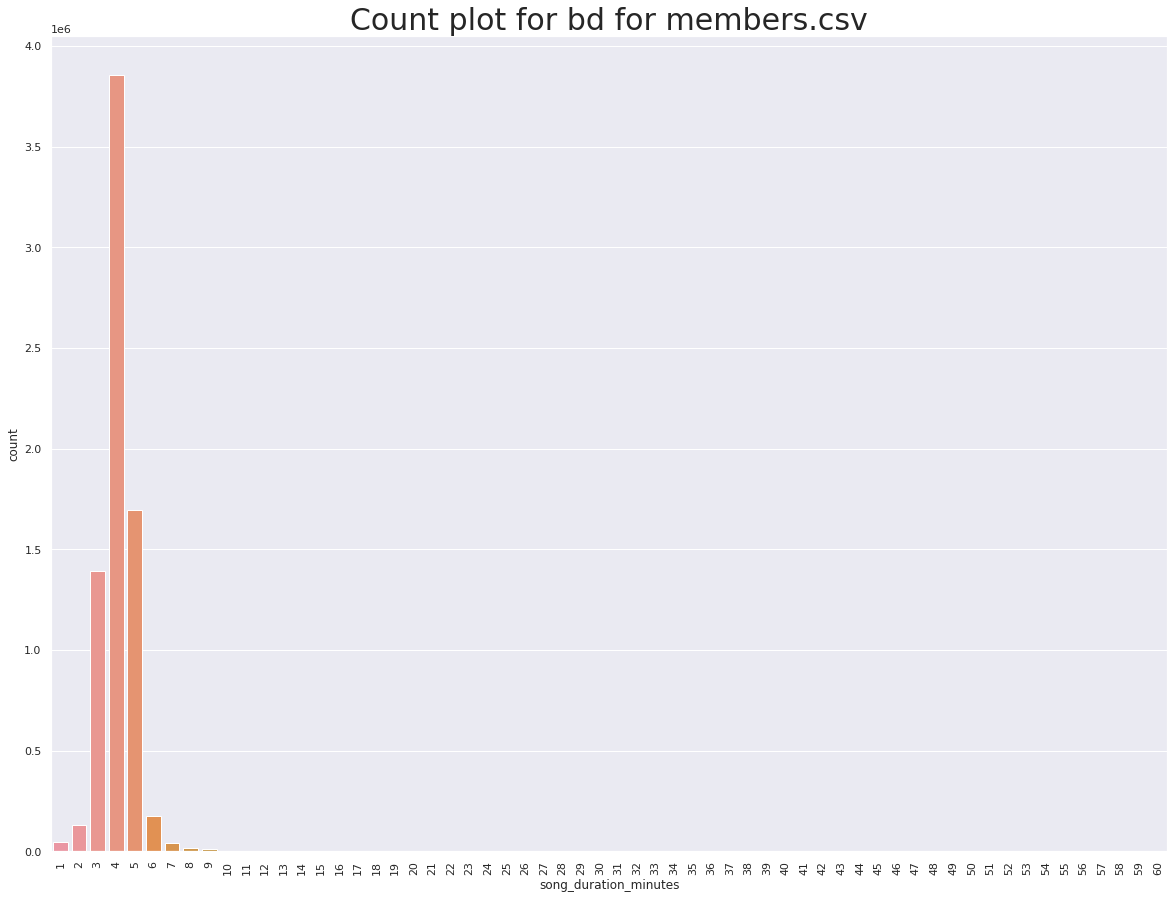

In [ ]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='song_duration_minutes', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

###From above output we can say that most user preferred listening to songs of 3,4,5 minutes in these three 4 minutes songs are most preferred

###getting country_code,registration_code and song_year from isrc
what is isrc : https://isrc.ifpi.org/en/isrc-standard/code-syntax 

In [ ]:
#https://www.kaggle.com/asmitavikas/feature-engineered-0-68310

isrc                             = final_train['isrc']
final_train['country_code']      = isrc.str.slice(0, 2)
final_train['registration_code'] = isrc.str.slice(2, 5)
final_train['song_year']         = isrc.str.slice(5, 7)
#final_train['song_year']         = final_train['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)

In [ ]:
final_train['song_year'] = final_train['song_year'] .replace("no", 0)

In [ ]:
final_train['song_year']=final_train['song_year'].astype(int)

In [ ]:
import statistics

median_value = int(statistics.median(final_train["song_year"])) #finding median value 

In [ ]:
final_train['song_year'] = final_train['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)

###grouping multiple feaure from got get more context out of our data
like we have seen there is many repeated value of song_id and msno which means there are many user who listen to same song ,and preferred some artist like i like arjit singh 

In [ ]:
#code take from : https://github.com/khushi810/KKBOX_Music_Recommendation_Challenge/blob/master/Music_Recommendation_(EDA%2BFE).ipynb
#song count for each user
member_song_count = final_train.groupby('msno').count()['song_id'].to_dict()
final_train['member_song_count'] = final_train['msno'].apply(lambda x: member_song_count[x])

#artist count for each song
artist_song_count = final_train.groupby('artist_name').count()['song_id'].to_dict()
final_train['artist_song_count'] = final_train['artist_name'].apply(lambda x: artist_song_count[x])

#genre count for each song
first_genre_id_song_count = final_train.groupby('genre_id').count()['song_id'].to_dict()
final_train['genre_id'] = final_train['genre_id'].apply(lambda x: first_genre_id_song_count[x])

#language count for each song
lang_song_count = final_train.groupby('language').count()['song_id'].to_dict()
final_train['lang_song_count'] = final_train['language'].apply(lambda x: lang_song_count[x])

#user count for each song
song_member_count = final_train.groupby('song_id').count()['msno'].to_dict()
final_train['song_member_count'] = final_train['song_id'].apply(lambda x: song_member_count[x])

#agecount for each song
age_song_count = final_train.groupby('bd').count()['song_id'].to_dict()
final_train['age_song_count'] = final_train['bd'].apply(lambda x: age_song_count[x])


In [ ]:
final_train = final_train.drop(columns="isrc")

In [ ]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,name,artist_name,language,song_duration_minutes,genre_id,month,day,year,ex_month,ex_day,ex_year,ex_dayofweek,country_code,registration_code,song_year,member_song_count,artist_song_count,lang_song_count,song_member_count,age_song_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,2012-01-02,2017-10-05,Good Grief,Bastille,52.0,3,109507,1,2,0,10,5,2017,3,GB,UM7,2016,5511,1140,1864413,215,3065367
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Lords of Cardboard,Various Artists,52.0,5,182072,5,25,2,9,11,2017,0,US,3C6,1999,622,303506,1864413,1,258688
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Hip Hop Is Dead(Album Version (Edited)),Nas,52.0,4,182072,5,25,2,9,11,2017,0,US,UM7,2006,622,289,1864413,4,258688
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Disco Africa,Soundway,-1.0,4,39,5,25,2,9,11,2017,0,GB,UQH,2010,622,1,308497,1,258688
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,2012-01-02,2017-10-05,Sleep Without You,Brett Young,52.0,3,33568,1,2,0,10,5,2017,3,QM,3E2,2016,5511,427,1864413,412,3065367


In [ ]:
# Saving my final dataset to my google drive
path = '/content/drive/My Drive/music recommendation system/'

final_train.to_csv(path + 'copy_final_train.csv', index=False)

#**SUMMARY OF FEATURE ENGINEERING**

*   We have performed numerical imputation of missing value
*   We have filled numerical missing value to median of the coulmn
*   We have replaced NaN,nan value with data_not_available
*   We have found registration days,year and month of the song from date_reistration_init and expiry days,year, month from expiration date
*   We try try extract new feature from existing feature we also try to come up with new feature using group_by method
*   After all the FE+EDA we come up with our final dataset 
*   Finally we save this final dataset to my google drive which we will used during developing our ML models

